In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.formula.api import ols

### EDA Exploratroy data analysis

In [2]:
# load orders csv
orders = pd.read_csv('olist_public_dataset_v2.csv')
orders.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [4]:
# check data type
orders.dtypes

order_id                          object
order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_id                       object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
product_id                        object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_ti

In [5]:
# change datatype
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_aproved_at'] = pd.to_datetime(orders.order_aproved_at).dt.date  
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date).dt.date  
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date).dt.date 

In [8]:
# load translation dataset and merge with orders
translation = pd.read_csv('product_category_name_translation.csv')
orders = orders.merge(translation, on='product_category_name')
orders.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01,2017-03-15,2017-02-06,...,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,health_beauty
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18,2018-05-10,2018-04-27,...,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,health_beauty
2,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18,2018-03-14,2018-03-03,...,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00,health_beauty
3,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11,2018-05-24,2018-05-17,...,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00,health_beauty
4,93ef9253c47e7dfc633c01f728488cb1,delivered,58.99,11.73,1,1,2017-10-26 09:07:04,2017-10-27,2017-11-09,2017-10-31,...,492,2,7c1bd920dbdf22470b68bde975dd3ccf,93ef9253c47e7dfc633c01f728488cb1,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00,health_beauty


In [68]:
# check missing values
orders.isna().sum()

order_id                            0
order_status                        0
order_products_value                0
order_freight_value                 0
order_items_qty                     0
order_sellers_qty                   0
order_purchase_timestamp            0
order_aproved_at                   18
order_estimated_delivery_date       0
order_delivered_customer_date    2405
customer_id                         0
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_id                          0
review_score                        0
product_category_name_english       0
dtype: int64

In [70]:
# drop missing values
orders.dropna(subset='order_delivered_customer_date', inplace= True)
orders.isna().sum()

order_id                          0
order_status                      0
order_products_value              0
order_freight_value               0
order_items_qty                   0
order_sellers_qty                 0
order_purchase_timestamp          0
order_aproved_at                 17
order_estimated_delivery_date     0
order_delivered_customer_date     0
customer_id                       0
customer_city                     0
customer_state                    0
customer_zip_code_prefix          0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_id                        0
review_score                      0
product_category_name_english     0
dtype: int64

### Our objectives : predict the review score
Drop review related columns since we are going to predict it.

In [11]:
# drop unrelated columns
orders.drop(columns = ['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','review_id'], inplace=True)

In [71]:
# split the dateset to train
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(orders, test_size=0.2, random_state=123)

In [72]:
# check the proportion of original dateset and train dataset
print(orders['review_score'].value_counts(normalize=True))
print(train_set['review_score'].value_counts(normalize=True))

review_score
5    0.578523
4    0.195799
1    0.104708
3    0.087638
2    0.033332
Name: proportion, dtype: float64
review_score
5    0.579666
4    0.195989
1    0.104027
3    0.087530
2    0.032789
Name: proportion, dtype: float64


### Choose features of prediction

In [73]:
train_set.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_score,product_category_name_english
86458,63c13ac76f7d8150f5128b0835d3c118,delivered,166.99,33.62,1,1,2018-01-15 08:25:42,2018-01-15,2018-02-19,2018-01-23,...,Flores,PE,568,cool_stuff,57,1620,1,4413a608a42bd21bbf9d5abbd58c249a,5,cool_stuff
72190,76b05be6385f04d85e7f83a5ebaa357a,delivered,27.00,15.10,1,1,2018-01-10 21:45:56,2018-01-10,2018-02-14,2018-01-23,...,Sorocaba,SP,180,brinquedos,41,805,4,a46dc1348c010515812846656640cb06,5,toys
20571,1fc71eb4a30dced088d988c57e751078,delivered,19.90,18.24,1,1,2018-07-17 12:33:50,2018-07-17,2018-08-03,2018-07-24,...,Cascavel,PR,858,cama_mesa_banho,42,188,3,c395a11dd90b985496c100861b7c4710,5,bed_bath_table
56700,367258cb8adb7d125d3c49861d32497f,delivered,299.90,27.38,1,1,2017-08-06 21:30:58,2017-08-06,2017-09-11,2017-08-23,...,Quixeramobim,CE,638,relogios_presentes,59,591,2,4a7e6e413022cde06218faa2853e2adc,5,watches_gifts
43165,d51d47c376acc042f6cd2811a08b5c62,delivered,99.90,13.25,1,1,2018-02-07 15:44:19,2018-02-08,2018-02-23,2018-02-14,...,Sao Paulo,SP,35,esporte_lazer,53,185,2,cbc1321327e4846330530a9abcc13841,5,sports_leisure


In [75]:
# Only keep related features
train_set = train_set[['order_status', 'order_products_value',
                 'order_freight_value', 'order_items_qty', 'order_sellers_qty',
                 'order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                 'order_delivered_customer_date', 'customer_state', 
                 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 
                 'product_photos_qty', 'review_score']]

In [76]:
train_set.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,review_score
count,78076.000000,78076.000000,78076.000000,78076.000000,78076,78076.000000,78076.000000,78076.000000,78076.000000
mean,128.228503,21.682140,1.099173,1.143527,2017-11-22 05:17:11.089028096,48.896575,778.001306,2.275526,4.114478
min,2.290000,0.000000,1.000000,1.000000,2016-09-05 00:15:33,5.000000,8.000000,1.000000,1.000000
25%,46.900000,13.470000,1.000000,1.000000,2017-07-24 11:34:08.750000128,42.000000,339.000000,1.000000,4.000000
50%,83.550000,16.780000,1.000000,1.000000,2017-11-24 21:28:30.500000,52.000000,589.000000,2.000000,5.000000
75%,145.000000,22.990000,1.000000,1.000000,2018-03-20 19:37:57.249999872,57.000000,979.000000,3.000000,5.000000
max,13440.000000,1562.100000,20.000000,30.000000,2018-09-28 10:54:31,72.000000,3992.000000,20.000000,5.000000
std,190.772433,19.993684,0.455079,0.716948,NaN,10.114879,665.237063,1.745552,1.312063


In [77]:
# check correlation of each numerical features
corr_matrix = train_set[['order_products_value','order_freight_value','order_items_qty','order_sellers_qty','order_purchase_timestamp','product_name_lenght','product_description_lenght','product_photos_qty','review_score']].corr()
corr_matrix['review_score'].sort_values(ascending = False)

review_score                  1.000000
product_description_lenght    0.017909
product_photos_qty            0.016835
order_purchase_timestamp     -0.009377
product_name_lenght          -0.013086
order_products_value         -0.013467
order_freight_value          -0.074216
order_items_qty              -0.082874
order_sellers_qty            -0.149623
Name: review_score, dtype: float64

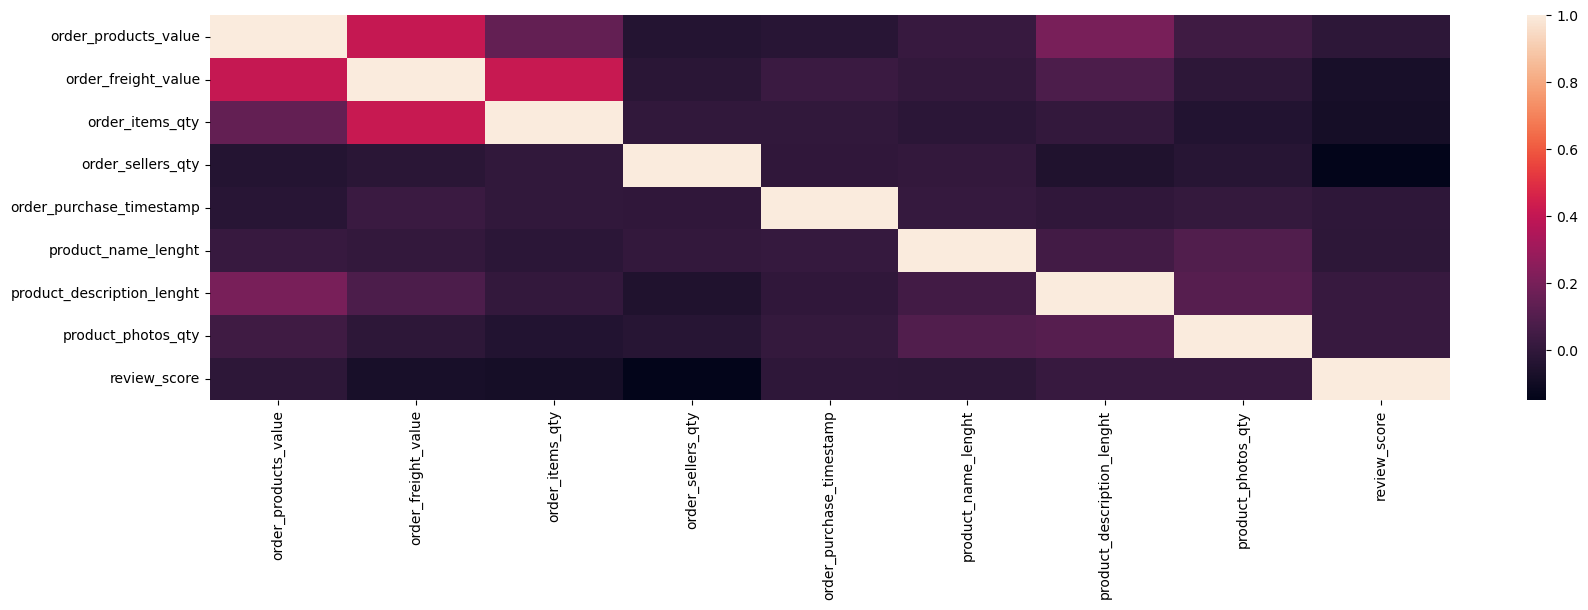

In [78]:
plt.figure(figsize=(20,5))
sns.heatmap(corr_matrix)
plt.show()

### Create new features
According to the correlation result, no feature has strong correlation with review score, so we are going to create some new features <br>
1, delivery duration <br>
2, delivery is late or not

In [79]:
train_set['is_late'] = train_set['order_delivered_customer_date'] > train_set['order_estimated_delivery_date']
train_set['delivery_duration'] = train_set['order_delivered_customer_date'] - train_set['order_purchase_timestamp'].dt.date

In [99]:
# change datetime delta to numerical values
train_set['delivery_duration'] = train_set['delivery_duration'].apply(lambda x : x.days)

In [100]:
type(train_set['delivery_duration'][0])

numpy.int64

In [104]:
corr_matrix1 = train_set[['order_products_value','order_freight_value','order_items_qty','order_sellers_qty','product_name_lenght','product_description_lenght','product_photos_qty','review_score','is_late','delivery_duration']].corr()
corr_matrix1['review_score'].sort_values(ascending = False)

review_score                  1.000000
product_description_lenght    0.017909
product_photos_qty            0.016835
product_name_lenght          -0.013086
order_products_value         -0.013467
order_freight_value          -0.074216
order_items_qty              -0.082874
order_sellers_qty            -0.149623
delivery_duration            -0.310029
is_late                      -0.366593
Name: review_score, dtype: float64

According to the result, most related features are as followings : <br>
order_sellers_qty            -0.149623 <br>
delivery_duration            -0.310029 <br>
is_late                      -0.366593 

### Modeling 
linear regression

In [106]:
model1 = ols('review_score ~ is_late*delivery_duration*order_sellers_qty', data= train_set).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2378.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:36:52   Log-Likelihood:            -1.2445e+05
No. Observations:               78076   AIC:                         2.489e+05
Df Residuals:                   78068   BIC:                         2.490e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               4.8465      0.016    300.304      0.000       4.815       4.878
is_late[T.True]                                        -1.6092      0.127    -12.659      0.000      -1.858      -1.360
delivery_duration                                      -0.0221      0.001    -15.592      0.000      -0.025      -0.019
is_late[T.True]:delivery_duration                      -0.0046      0.004     -1.320      0.187      -0.012       0.002
order_sellers_qty                                      -0.2934      0.012    -25.310      0.000      -0.316      -0.271
is_late[T.True]:order_sellers_qty                      -0.1761      0.114     -1.547      0.122      -0.399       0.047
delivery_duration:order_sellers_qty                    -0.0017      0.001     -1.573      0.116      -0.004       0.000
is_late[T.True]:delivery_duration:order_sellers_qty     0.0139      0.003      4.514      0.000       0.008       0.020
==============================================================================
Omnibus:                    15153.577   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27490.234
Skew:                          -1.232   Prob(JB):                         0.00
Kurtosis:                       4.541   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model2 = ols('review_score ~ is_late + delivery_duration + order_sellers_qty', data= train_set).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     5499.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:39:30   Log-Likelihood:            -1.2451e+05
No. Observations:               78076   AIC:                         2.490e+05
Df Residuals:                   78072   BIC:                         2.491e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.8188      0.010    460.017      0.000       4.798       4.839
is_late[T.True]      -1.5259      0.022    -69.409      0.000      -1.569      -1.483
delivery_duration    -0.0205      0.001    -36.409      0.000      -0.022      -0.019
order_sellers_qty    -0.3039      0.006    -51.010      0.000      -0.316      -0.292
==============================================================================
Omnibus:                    15236.529   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27830.210
Skew:                          -1.234   Prob(JB):                         0.00
Kurtosis:                       4.570   Cond. No.                         82.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""